In [1]:
import matplotlib.pyplot as plt
from random import random as random_01, randint as _randint, seed
from collections import Counter
from IPython.display import display
from ipywidgets import IntProgress
from itertools import cycle, accumulate
from statistics import correlation, linear_regression, stdev
from bisect import bisect

In [2]:
# We defined randint to be on a half-open range [a; b) / [a; b[, so redefine it accordingly

def randint(a, b):
    return _randint(a, b - 1)

# Amount of samples
k = 10**6

# Population size
n = 25

population = list(range(n))
weights = list(range(n))

In [3]:
# optimized a bit for speed of plotting
naive_weighted_population = []
for w, p in zip(population, weights):
    naive_weighted_population.extend(p for _ in range(w))

def naive_weighted_draw():
    return naive_weighted_population[randint(0, len(naive_weighted_population))]

total_w = sum(weights)
probabilities = list(map(lambda w: w / total_w, weights))
repeated_population_and_probabilities = cycle(zip(population, probabilities))
def repeated_weighted_draw():
    total_w = sum(weights)
    probabilities = map(lambda w: w / total_w, weights)
    for e, p in repeated_population_and_probabilities:
        if random_01() <= p:
            return e
    raise NotImplemented


cum_weights = list(accumulate(weights))
max_cum_weight = cum_weights[-1]
def cum_weighted_draw():
    idx = bisect(cum_weights, random_01() * cum_weights[-1])
    return population[idx]

In [4]:
def sample_func(func, n, k):
    seed(0xAABBCCDDEEFF)
    c = Counter()
    ls = list(range(n))
    for _ in range(k):
        c.update([func()])
    return dict(c)

In [5]:
naive = sample_func(naive_weighted_draw, n, k)
repeated = sample_func(repeated_weighted_draw, n, k)
cum = sample_func(cum_weighted_draw, n, k)

Naive:
stdev(y)=23615.447810180573
slope=3339.6678260869567 intercept=-79.18115942029544
Naive correlation: 0.9999817855321734
--------
Repeated:
stdev(y)=23605.965897861806
slope=3338.3260869565215 intercept=-62.409420289855916
Naive correlation: 0.9999815403074543
--------
Cumulative:
stdev(y)=23558.89825553166
slope=3331.6095652173913 intercept=21.547101449272304
Naive correlation: 0.9999634491727714
--------


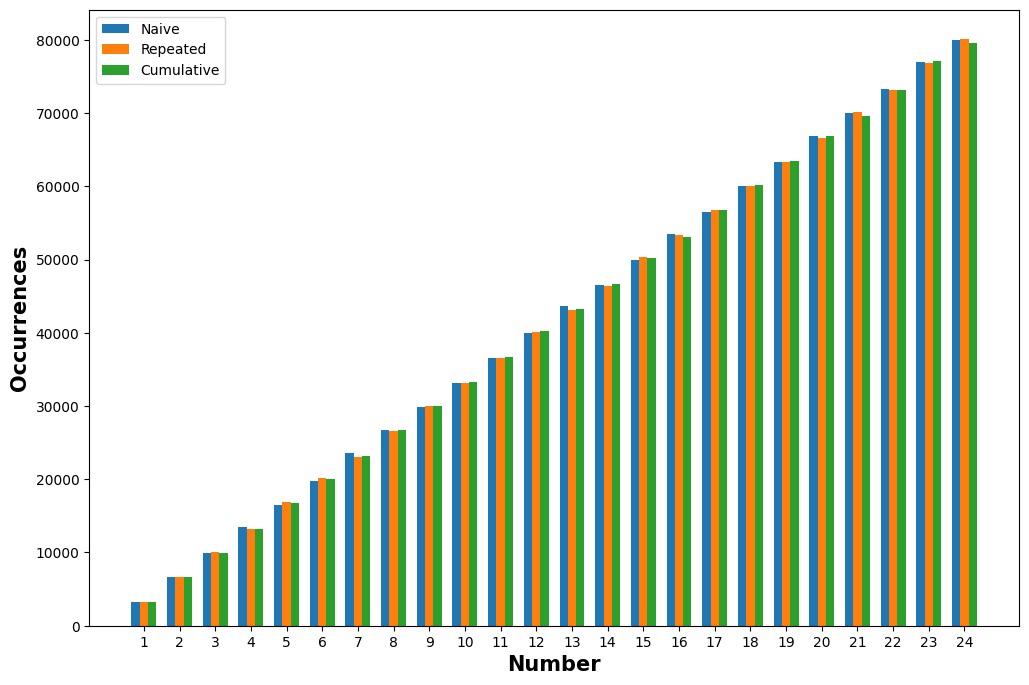

In [6]:
fig, ax = plt.subplots(figsize =(12, 8))

methods = [(naive, "Naive"), (repeated, "Repeated"), (cum, "Cumulative")]
width = 1 / len(methods) - 0.1

for i, (s, label) in enumerate(methods):
    offset = width * i
    x = list(s.keys())
    y = list(s.values())
    print(label + ":")
    print(f"{stdev(y)=}")
    slope, intercept = linear_regression(x, y)
    print(f"{slope=} {intercept=}")
    print(f"Naive correlation: {correlation(x, y)}")
    print("-" * 8)
    ax.bar([x + offset for x in x], y, label=label, width=width)

plt.xlabel('Number', fontweight ='bold', fontsize = 15)
plt.ylabel('Occurrences', fontweight ='bold', fontsize = 15)
plt.xticks([n + width * 1 for n in range(1, n)], range(1, n))
plt.legend()
plt.show()